<a href="https://colab.research.google.com/github/toni-ramchandani/AIMasterClassTTT/blob/main/Section_3_2_Regression%26Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A **regression model** in machine learning is a type of predictive model used to estimate or predict a **continuous outcome variable** (also known as the dependent variable or target) based on one or more input variables (independent variables or features). It is a fundamental type of supervised learning where the relationship between the input features and the target variable is modeled.

### Key Characteristics of Regression Models:
1. **Continuous Output**: The target variable in regression models is continuous, meaning it can take any real-valued number (e.g., predicting house prices, temperatures, or stock prices).
2. **Relationship Estimation**: Regression models attempt to capture the relationship between input variables and the target variable, either linearly or non-linearly.
3. **Error Minimization**: The model is trained by minimizing the error (e.g., mean squared error) between the predicted and actual values.

---

### Types of Regression Models:
1. **Linear Regression**:
   - Models the relationship between input features and the target variable using a straight line.
   - Example: \( y = \beta_0 + \beta_1 x_1 + \ldots + \beta_n x_n + \epsilon \), where \( y \) is the target, \( x \) are the inputs, and \( \beta \) are the coefficients.

2. **Polynomial Regression**:
   - Extends linear regression by including polynomial terms to capture non-linear relationships.
   - Example: \( y = \beta_0 + \beta_1 x + \beta_2 x^2 + \ldots \).

3. **Ridge and Lasso Regression**:
   - Variants of linear regression that add regularization terms to prevent overfitting.
   - **Ridge Regression** uses L2 regularization (penalizes squared coefficients).
   - **Lasso Regression** uses L1 regularization (penalizes absolute coefficients, performing feature selection).

4. **Logistic Regression**:
   - Although technically a classification model, it predicts probabilities of categorical outcomes and can be thought of as regression in its methodology.

5. **Support Vector Regression (SVR)**:
   - Uses Support Vector Machines to predict a continuous target value by finding a hyperplane that minimizes the error within a specified margin.

6. **Decision Tree Regression**:
   - Uses a tree structure to make predictions based on splitting the data into subsets.

7. **Random Forest Regression**:
   - An ensemble method that combines multiple decision trees to improve prediction accuracy.

8. **Gradient Boosting Regression**:
   - An advanced ensemble method that builds models sequentially to correct errors made by previous models.

---

### Applications of Regression Models:
- Predicting house prices based on features like size, location, and number of bedrooms.
- Forecasting stock prices or sales trends.
- Estimating demand or supply in business scenarios.
- Modeling relationships in scientific research (e.g., the effect of temperature on crop yield).

---

### Evaluation Metrics for Regression:
- **Mean Squared Error (MSE)**: Measures the average squared difference between predicted and actual values.
- **Root Mean Squared Error (RMSE)**: The square root of MSE, giving error in the same units as the target.
- **Mean Absolute Error (MAE)**: Measures the average absolute difference between predictions and true values.
- **R-squared (R²)**: Indicates how well the model explains the variability in the target variable.

Regression models are foundational in machine learning and are often the starting point for predictive analytics tasks due to their simplicity and interpretability.

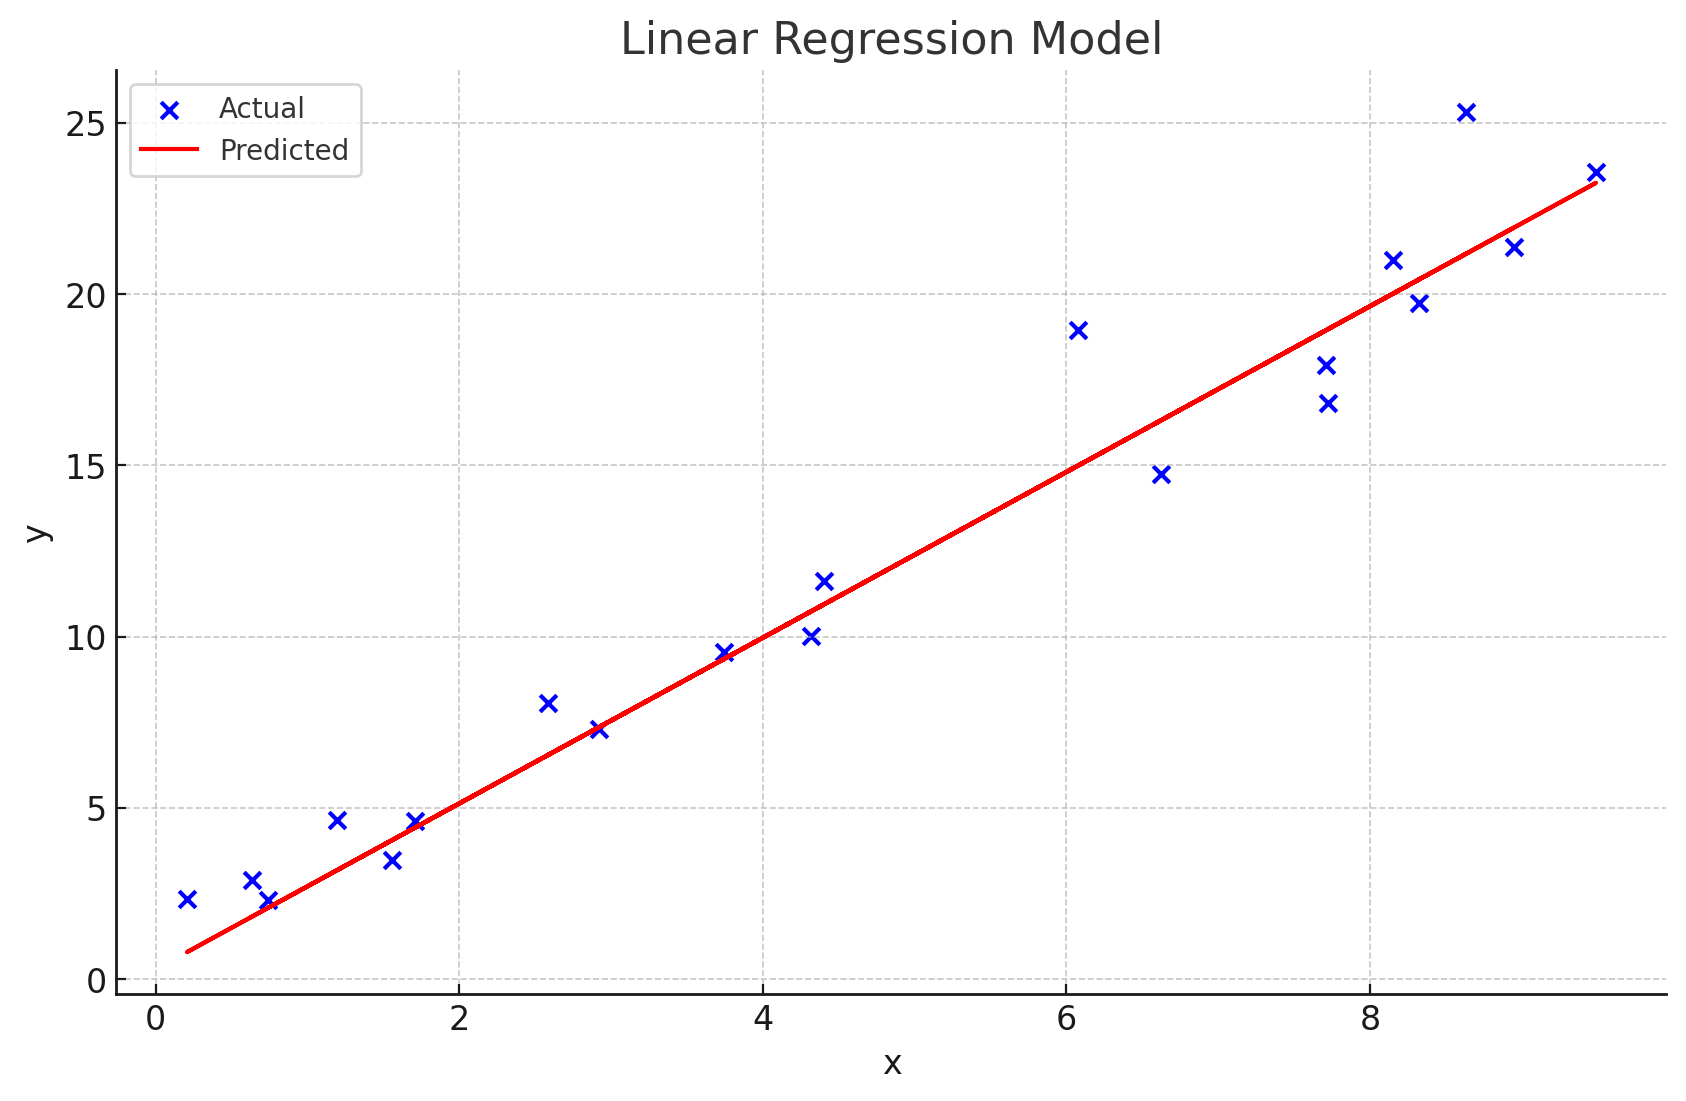

Implementing a regression model using the synthetic real-world-like housing dataset:

### Explanation of the Code:
1. **Data Generation**:
   - House size, number of rooms, and distance to the city are used as features.
   - The target (price) is generated using a synthetic formula with added noise to simulate real-world variability.

2. **Train-Test Split**:
   - The data is split into training (80%) and testing (20%) sets.

3. **Model Training**:
   - A linear regression model is trained using the `LinearRegression` class from `sklearn`.

4. **Evaluation**:
   - The model's performance is evaluated using **Mean Squared Error (MSE)** and **R-squared (R²)** metrics.

5. **Visualization**:
   - A scatter plot compares the actual vs. predicted prices to evaluate the model's accuracy visually.

You can run this code to see the regression model in action with a synthetic real-world-like dataset! Let me know if you need further customizations or explanations.

Intercept: -38.926212494163224
Coefficients:
  House Size (sqft): 0.31031687681944753
  Number of Rooms: 3.909696254900548
  Distance to City (km): -0.8380102998496741
Mean Squared Error (MSE): 11872.856874624329
R-squared (R²): 0.8818466890394111


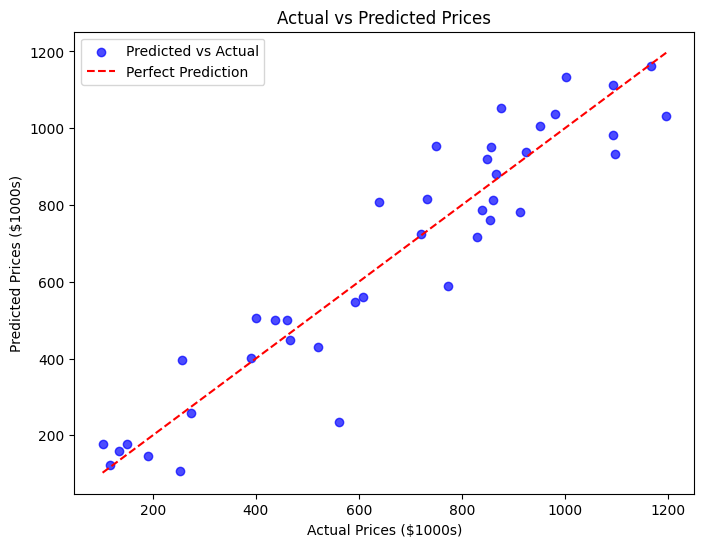

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Generate synthetic housing data
np.random.seed(42)

# Features: house size (in sqft), number of rooms, distance to city center (in km)
house_size = np.random.randint(500, 4000, size=200)  # in square feet
rooms = np.random.randint(1, 7, size=200)  # number of rooms
distance_to_city = np.random.uniform(1, 50, size=200)  # in km

# Target: house price (in $1000s) based on a synthetic formula with noise
price = 0.3 * house_size + 10 * rooms - 2 * distance_to_city + np.random.normal(0, 100, size=200)

# Combine into a DataFrame
housing_data = pd.DataFrame({
    'House Size (sqft)': house_size,
    'Number of Rooms': rooms,
    'Distance to City (km)': distance_to_city,
    'Price ($1000s)': price
})

# Split the data into features and target
X = housing_data[['House Size (sqft)', 'Number of Rooms', 'Distance to City (km)']]
y = housing_data['Price ($1000s)']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
real_world_model = LinearRegression()
real_world_model.fit(X_train, y_train)

# Make predictions
y_pred = real_world_model.predict(X_test)

# Evaluate the model
real_world_mse = mean_squared_error(y_test, y_pred)
real_world_r2 = r2_score(y_test, y_pred)

# Print results
print("Intercept:", real_world_model.intercept_)
print("Coefficients:")
for feature, coef in zip(X.columns, real_world_model.coef_):
    print(f"  {feature}: {coef}")
print("Mean Squared Error (MSE):", real_world_mse)
print("R-squared (R²):", real_world_r2)

# Plot the relationship between predicted and actual prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices ($1000s)')
plt.ylabel('Predicted Prices ($1000s)')
plt.legend()
plt.show()




---



---



# Classification model

### **Classification Model in Machine Learning**

A **classification model** in machine learning is used to predict **categorical outcomes**, where the target variable belongs to one of the predefined classes. It falls under the category of **supervised learning**, as the model is trained on labeled data.

For example, given features like **age, income, and education level**, a classification model can predict whether a person is likely to **buy a product** ("Yes" or "No").

---

### **Steps to Build a Classification Model**

1. **Problem Definition**:
   - Identify the problem and ensure the target variable is categorical.
   - Example: Predict whether an email is **spam** or **not spam**.

2. **Dataset Preparation**:
   - Collect data and identify features (independent variables) and the target (dependent variable).
   - Example Dataset:
     | Feature 1 | Feature 2 | Target |
     |-----------|-----------|--------|
     | 45        | 50000     | Yes    |
     | 32        | 40000     | No     |

3. **Data Preprocessing**:
   - **Handle Missing Values**: Fill or remove missing data.
   - **Feature Scaling**: Normalize or standardize numerical features to ensure all features are on the same scale.
   - **Encode Categorical Variables**: Convert text labels into numeric form (e.g., using one-hot encoding).

4. **Splitting the Dataset**:
   - Divide the dataset into **training** and **testing** subsets (e.g., 80% for training and 20% for testing).
   - The training data is used to fit the model, while the testing data is used to evaluate its performance.

5. **Model Selection**:
   - Choose an appropriate classification algorithm based on the problem and dataset size:
     - **Logistic Regression**: For binary classification problems (e.g., Yes/No).
     - **Decision Tree**: For interpretable and simple classification.
     - **Random Forest**: For ensemble-based, robust classification.
     - **Support Vector Machine (SVM)**: For complex decision boundaries.
     - **K-Nearest Neighbors (KNN)**: For distance-based classification.
     - **Neural Networks**: For more complex, non-linear problems.
     - **Naive Bayes**: For problems with categorical features (e.g., text classification).

6. **Training the Model**:
   - Use the training data to learn patterns in the dataset by minimizing a specific loss function.
   - Example: Logistic Regression uses a loss function based on **log-likelihood**.

7. **Making Predictions**:
   - Apply the trained model to the test set to make predictions.

8. **Model Evaluation**:
   - Use performance metrics to assess the model's quality:
     - **Accuracy**: Percentage of correct predictions.
     - **Precision**: How many positive predictions were correct.
     - **Recall**: How many actual positives were correctly identified.
     - **F1 Score**: Harmonic mean of precision and recall.
     - **Confusion Matrix**: Shows counts of true positives, false positives, true negatives, and false negatives.





---

### **Real-World Applications**
- **Spam Detection**: Classify emails as spam or not.
- **Fraud Detection**: Predict fraudulent transactions.
- **Medical Diagnosis**: Predict diseases based on patient symptoms.
- **Sentiment Analysis**: Classify text as positive, negative, or neutral.

This pipeline provides a comprehensive approach to solving classification problems. You can extend it to handle multi-class classification tasks by switching to appropriate models (e.g., multinomial logistic regression). Let me know if you'd like more details on advanced classification techniques!

Implement a classification model using a synthetic real-world-like dataset. We'll create a dataset to classify whether a house is "expensive" or "affordable" based on features like house size, number of rooms, and distance from the city center.

### Explanation of the Code:

1. **Data Generation**:
   - Features: House size, number of rooms, and distance from the city.
   - Target: Binary classification (`Is Expensive`) based on whether the house price is above or below the median.

2. **Train-Test Split**:
   - Data is split into training (80%) and testing (20%) sets.

3. **Model Training**:
   - A `LogisticRegression` model is trained on the training data.

4. **Evaluation**:
   - The model's performance is evaluated using metrics like **accuracy**, a **confusion matrix**, and a **classification report** (precision, recall, F1-score).

5. **Visualization**:
   - A heatmap is used to visualize the confusion matrix for better interpretability.

---

### Expected Output:
- **Accuracy**: The percentage of correctly classified instances.
- **Confusion Matrix**: A table showing the number of true positives, true negatives, false positives, and false negatives.
- **Classification Report**: Detailed metrics like precision, recall, and F1-score for each class.

You can use this example to implement a classification model for real-world-like scenarios. Let me know if you'd like to explore specific datasets or more complex classification techniques!

Accuracy: 0.95

Confusion Matrix:
 [[17  1]
 [ 1 21]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       0.95      0.95      0.95        22

    accuracy                           0.95        40
   macro avg       0.95      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40



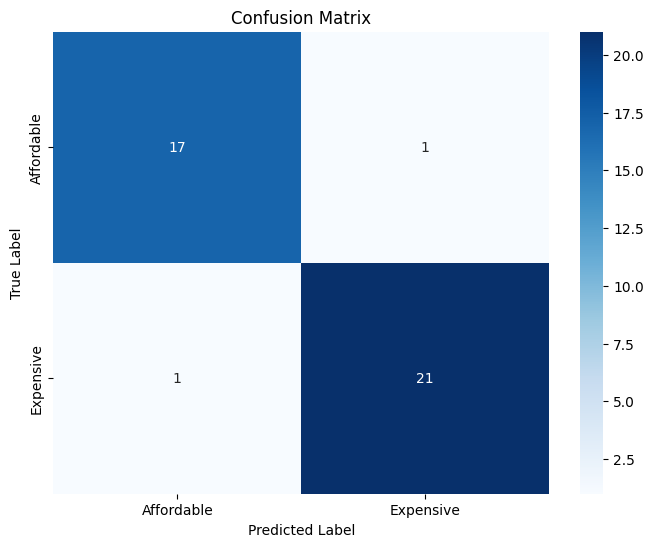

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Generate synthetic housing data
np.random.seed(42)

# Features: house size (in sqft), number of rooms, distance to city center (in km)
house_size = np.random.randint(500, 4000, size=200)  # in square feet
rooms = np.random.randint(1, 7, size=200)  # number of rooms
distance_to_city = np.random.uniform(1, 50, size=200)  # in km

# Target: Binary classification for "Expensive" or "Affordable" (1 for expensive, 0 for affordable)
price = 0.3 * house_size + 10 * rooms - 2 * distance_to_city + np.random.normal(0, 100, size=200)
is_expensive = (price > np.median(price)).astype(int)  # Label as 1 if price is above median, else 0

# Combine into a DataFrame
classification_data = pd.DataFrame({
    'House Size (sqft)': house_size,
    'Number of Rooms': rooms,
    'Distance to City (km)': distance_to_city,
    'Is Expensive': is_expensive
})

# Split the data into features and target
X = classification_data[['House Size (sqft)', 'Number of Rooms', 'Distance to City (km)']]
y = classification_data['Is Expensive']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
classification_model = LogisticRegression()
classification_model.fit(X_train, y_train)

# Make predictions
y_pred = classification_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print results
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Affordable', 'Expensive'], yticklabels=['Affordable', 'Expensive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
